<a href="https://colab.research.google.com/github/m-atique/deeplearning-assignment/blob/main/CreditCard_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ml data/creditcard.csv')

In [ ]:
df['Class'].unique()

array([0, 1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.shape

(284807, 31)

In [ ]:
y=df['Class']


In [ ]:
df.drop(columns='Class')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
train_data=df[:142404]
test_data= df[142404:227846]
val_data= df[227846:]
train_labels = y[:142404]
test_labels= y[142404:227846]
val_labels= y[227846:]

In [ ]:
mean = train_data.mean(axis=0)
std = train_data.mean(axis=0)
train_data -= mean
train_data /= std

val_data -= mean
val_data /= std

test_data -= mean
test_data /= std

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(10,activation='relu', input_shape=(31,)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(6,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_data,train_labels,epochs=10,batch_size=512,validation_data=(val_data,val_labels))

Epoch 1/10
279/279 [==============================] - 1s 3ms/step - loss: 1.2743 - accuracy: 0.7230 - val_loss: 0.0297 - val_accuracy: 0.9987
Epoch 2/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0191 - accuracy: 0.9981 - val_loss: 0.0114 - val_accuracy: 0.9987
Epoch 3/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 0.0060 - val_accuracy: 0.9987
Epoch 4/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0025 - accuracy: 0.9981 - val_loss: 0.0029 - val_accuracy: 0.9997
Epoch 5/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.0020 - val_accuracy: 0.9998
Epoch 6/10
279/279 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 9.6426e-04 - val_accuracy: 0.9998
Epoch 7/10
279/279 [==============================] - 1s 2ms/step - loss: 8.3678e-04 - accuracy: 0.9999 - val_loss: 1.1560e-04 - val_accuracy: 1

In [ ]:
history = model.history.history

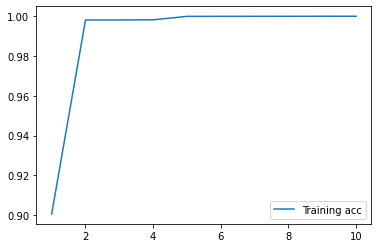

In [ ]:
train_acc = history['accuracy']
train_loss = history['loss']
val_loss = history['val_loss']
epoches =range(1,len(train_acc)+1)
plt.plot(epoches,train_acc,label='Training acc')

plt.legend()
plt.show()

#

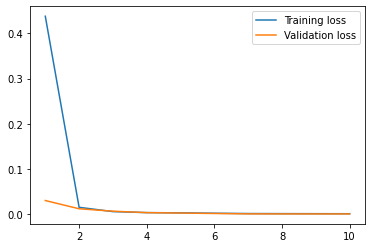

In [ ]:
plt.plot(epoches,train_loss,label='Training loss')
plt.plot(epoches,val_loss,label='Validation loss')
plt.legend()
plt.show()

In [ ]:
model.predict(test_data)

array([[1.1494577e-22],
       [1.0000000e+00],
       [7.0740516e-13],
       ...,
       [2.2073254e-13],
       [1.3503870e-17],
       [3.1710531e-16]], dtype=float32)

In [ ]:
model.evaluate(test_data,test_labels)

2671/2671 [==============================] - 3s 971us/step - loss: 0.0252 - accuracy: 0.9998


[0.025218745693564415, 0.9998478293418884]